<a href="https://colab.research.google.com/github/clint-bg/publicationdata/blob/main/safeSeparation/Heat_Injury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat Injury

Injury from exposure to radiative heat flux depends on the heat flux and the duration. Often the heat flux given off by the source is not a constant value, like from a burning collection of propellant. The heat flux is low than rises as more and more material is burning and then decreases. 

Below is a comparison of the heat injury (integral of the heat flux over time) for two differenct scenarios:
- a normal or gaussian like profile of heat flux versus time
- a non-normal profile

In [ ]:
# import needed packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate

## Normal profile of heat flux

Below is the normal estimate of a heat flux event as a function of time with the total thermal damage estimated

In [ ]:
t = np.linspace(0,1.96*2,100)

In [ ]:
n = norm.pdf(t,1.96)*20 #a ficticious but plausible heat flux curve

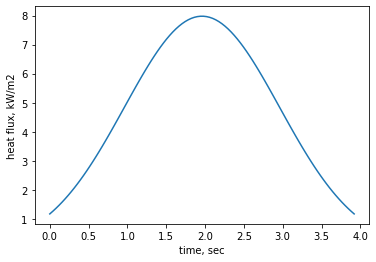

In [ ]:
plt.plot(t,n)
plt.xlabel("time, sec"); plt.ylabel("heat flux, kW/m2")
plt.show()

If the entire curve is integrated, that is a measure of the thermal damage. Such an approximation of the damage assumes that the damage scales linearly with heat flux. For example, if a person is exposed to 4 kW/m2 for 20 seconds, that damage is 80 kJ/m2, while a thermal heat flux 2 times that 4 kW/m2 value for the same 20 seconds yields a damage of 160 kJ/m2, a correspondingly linear outcome (double the heat flux and double the damage). However, it has been published that the thermal damage does not scale linearly with the heat flux. If the relationship to damage is thus non-linear, with, for example, a factor of an exponential of 1.2 then for a heat flux of 4 kW/m2 for 20 second the damage would be (20\*4^1.2) 105 kJ/m2 and if the heat flux is double to 8 the damage would be (20\*8^1.2) 242 kJ/mol. This is a non-linear relationship as when the heat flux is doubled, the damage increases by a factor greater than 2 (2.3 in this case). It is not known what that exponential multiplier would be for thermal damage but a value of 1.2 is considered conservative.

In [ ]:
factor = 1.2

In [ ]:
#estimate of the total damage from the curve
integrate.simpson(n**factor,t)

26.779256051514018

The above value is the damage measure given we know heat flux as a function of time. If we only know the average and the maximum heat fluxes one way is to use the average value and correspondingly estimate the damage:

In [ ]:
#using the average value of the heat flux burn to estimate the damage with the entire duration
max(t)*n.mean()**factor

25.81446659226213

That 25.8 value is close to the 26.8 damage "true" value

If on the other hand, the peak value is used with half the duration of the burn, the damage estimate is

In [ ]:
max(t)/2*n.max()**factor #max and half the time

23.68547013494428

That 23.7 value is significantly less than the 26.8 "true" value

Conclusion: the average value and full duration is a more accurate (and conservative) estimate than the peak value and half duration.

## Non-normal profile of heat flux

A non-normal profile of the heat flux during a burn from an energetic material is a more likely scenario. In such a non-normal profile, the burn may be proceeding in an average way and then ocasionally gives spurts or high heat fluxes. The below profile is fictional but also plausible.

In [ ]:
nn = np.concatenate((n[0:int(len(n)/2)],np.ones(500)*n.max(),n[int(len(n)/2):]))
#add a spurt
nn = nn + np.concatenate((n*0.5,np.zeros(500)))

In [ ]:
tt = np.linspace(0,1.96*20,len(nn))

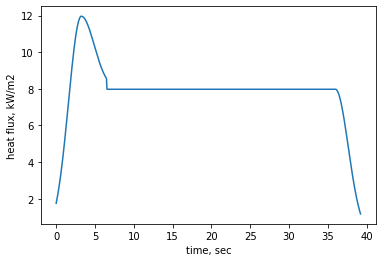

In [ ]:
plt.plot(tt,nn)
plt.xlabel("time, sec"); plt.ylabel("heat flux, kW/m2")
plt.show()

Completing the same steps as above for the normal curve, we get the following results:

In [ ]:
#actual thermal damage using the heat flux
integrate.simpson(nn**factor,tt)

468.3304325267019

In [ ]:
#using the average value of the heat flux burn to estimate the damage with the entire duration
max(tt)*nn.mean()**factor

464.6711604414533

In [ ]:
max(tt)/2*nn.max()**factor #max and half the time

385.29335623339824

Consistent with the previous result with a normal curve, this instance of a non-normal curve also yields that the average value for the total duration is more accurate (and conservative) than is the max for half the time.

Conclusion: again, the average value and full duration is a more conservative estimate than the peak value and half duration.